### Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import utils # Importe o utils.py do repositório mdeff/fma

### Audio Preprocessing

In [2]:
# 1. Carregar os dados oficiais
# Certifique-se de que o utils.py do mdeff/fma esteja no seu diretório
METADATA_DIR = '../fma_metadata' 
tracks = utils.load(f'{METADATA_DIR}/tracks.csv')
features = utils.load(f'{METADATA_DIR}/features.csv')

# 2. Filtrar pelo dataset 'small'
small_mask = tracks[('set', 'subset')] == 'small'

X_all = features.loc[small_mask]
y_all_labels = tracks.loc[small_mask, ('track', 'genre_top')]
splits = tracks.loc[small_mask, ('set', 'split')]

print(f"Total de faixas 'fma_small': {X_all.shape[0]}")
print(f"Total de features: {X_all.shape[1]}")

# 3. Codificar os Gêneros (Labels)
label_encoder = LabelEncoder()
y_all_encoded = label_encoder.fit_transform(y_all_labels)

# 4. Separar em Treino, Validação e Teste (usando os splits oficiais)
X_train = X_all[splits == 'training']
y_train = y_all_encoded[splits == 'training']

X_val = X_all[splits == 'validation']
y_val = y_all_encoded[splits == 'validation']

X_test = X_all[splits == 'test']
y_test = y_all_encoded[splits == 'test']

print(f"Amostras de Treino: {X_train.shape[0]}")
print(f"Amostras de Validação: {X_val.shape[0]}")
print(f"Amostras de Teste: {X_test.shape[0]}")

# 5. Normalizar as Features
scaler = StandardScaler()

# Ajustar (fit) APENAS nos dados de treino
scaler.fit(X_train)

# Transformar todos os conjuntos
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Total de faixas 'fma_small': 8000
Total de features: 518
Amostras de Treino: 6400
Amostras de Validação: 800
Amostras de Teste: 800


### K-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn

# 1. Treinamento do KNN
## Comece com um valor comum para k (n_neighbors)
k_knn = 100
knn = KNeighborsClassifier(n_neighbors=k_knn, n_jobs=-1)

print("Training KNN model...")
knn.fit(X_train_scaled, y_train)
print("Training is complete!\n")

Training KNN model...
Training is complete!



Acurácia do KNN (k=100): 34.62%

Relatório de Classificação:
               precision    recall  f1-score   support

   Electronic       0.62      0.18      0.28       100
 Experimental       0.73      0.08      0.14       100
         Folk       0.16      0.22      0.19       100
      Hip-Hop       0.48      0.74      0.58       100
 Instrumental       0.34      0.10      0.16       100
International       0.21      0.60      0.32       100
          Pop       0.39      0.15      0.22       100
         Rock       0.57      0.70      0.63       100

     accuracy                           0.35       800
    macro avg       0.44      0.35      0.31       800
 weighted avg       0.44      0.35      0.31       800


Matriz de Confusão:


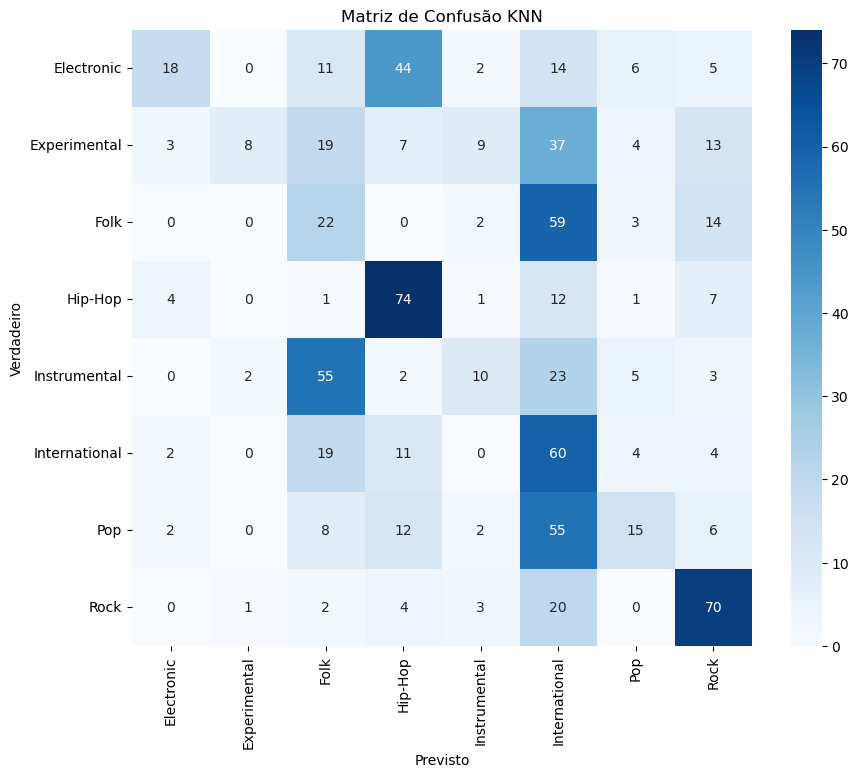

In [21]:
# 2. Avaliando o KNN
# Avalie no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN (k={k_knn}): {accuracy * 100:.2f}%")

# Relatório de Classificação (Precisão, Recall, F1-score por gênero)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matriz de Confusão
print("\nMatriz de Confusão:")
c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
seaborn.heatmap(c_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão KNN')
plt.show()